In [482]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [483]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [484]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [485]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [486]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [487]:
train.groupby(['Pclass'], as_index=False)['Survived'].mean()
# we are looking at survival odds based on passengers pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [488]:
train.groupby(['Sex'], as_index=False)['Survived'].mean()
#odds of survival based on sex, we can see that youre more likely to survive if youre a woman.

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [489]:
train.groupby(['SibSp'], as_index=False)['Survived'].mean()
#odds of survival based off SibSP

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [490]:
train.groupby(['Parch'], as_index=False)['Survived'].mean()
#odds of survival based of Parch catagory

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [491]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

#Determining family size by adding SibSp and Parch, we add one to account for the passenger themself.

In [492]:
train.groupby(['Family_Size'], as_index=False)['Survived'].mean()

#From this we can see the odds of survival basec on family size, the larger families odds, tend to drop significantly.

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [493]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train['Family_Size_Grouped'] = train['Family_Size'].map(family_map)
test['Family_Size_Grouped'] = train['Family_Size'].map(family_map)

#Code from the forum that is an easier method of group family sizes together. Data looks cleaner this way

In [494]:
train.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [495]:
train.groupby(['Embarked'], as_index=False)['Survived'].mean()
#odds of passenger survival based off point of embarkment

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


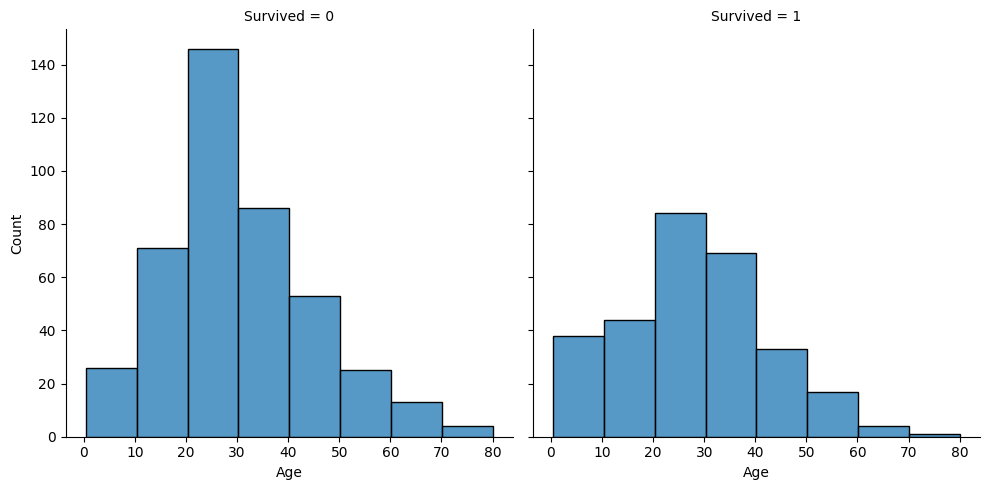

In [496]:
sns.displot(train, x='Age', col='Survived', binwidth=10, height=5)

In [497]:
train['Age_Cut'] = pd.qcut(train['Age'], 5)
test['Age_Cut'] = pd.qcut(test['Age'], 5)

In [498]:
train.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

C:\Users\Anna Tablada\AppData\Local\Temp\ipykernel_7272\2617431834.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 19.0]",0.481707
1,"(19.0, 25.0]",0.328467
2,"(25.0, 31.8]",0.393701
3,"(31.8, 41.0]",0.437500
4,"(41.0, 80.0]",0.373239


In [499]:
train.loc[train['Age'] <= 19, 'Age'] = 0
train.loc[(train['Age'] > 19) & (train['Age'] <= 25), 'Age'] = 1
train.loc[(train['Age'] > 25) & (train['Age'] <= 31.8), 'Age'] = 2
train.loc[(train['Age'] > 31.8) & (train['Age'] <= 41), 'Age'] = 3
train.loc[(train['Age'] > 41) & (train['Age'] <= 80), 'Age'] = 4
train.loc[train['Age'] > 80, 'Age'] 

test.loc[test['Age'] <= 19, 'Age'] = 0
test.loc[(test['Age'] > 19) & (test['Age'] <= 25), 'Age'] = 1
test.loc[(test['Age'] > 25) & (test['Age'] <= 31.8), 'Age'] = 2
test.loc[(test['Age'] > 31.8) & (test['Age'] <= 41), 'Age'] = 3
test.loc[(test['Age'] > 41) & (test['Age'] <= 80), 'Age'] = 4
test.loc[test['Age'] > 80, 'Age'] 

Series([], Name: Age, dtype: float64)

In [500]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,2,Small,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,1,Alone,"(31.8, 41.0]"


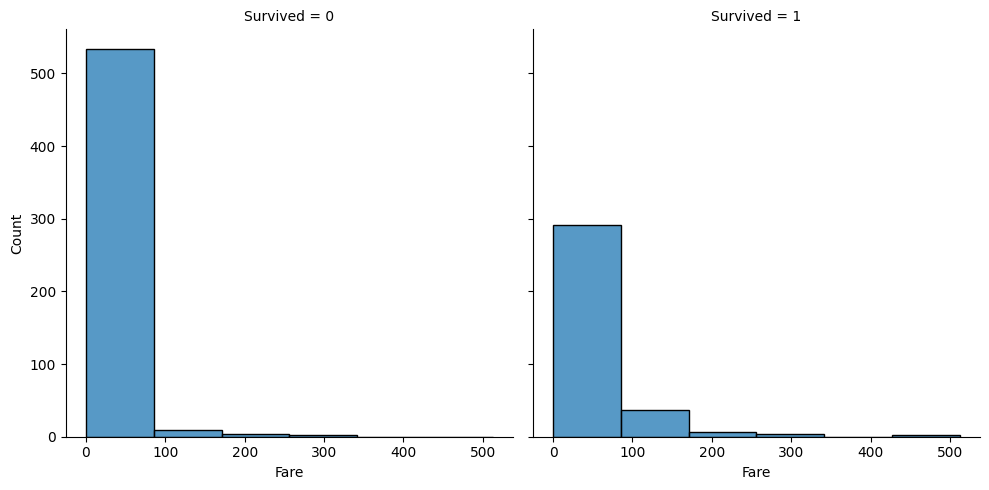

In [501]:
sns.displot(train, x='Fare', col='Survived', binwidth=80, height=5)

In [502]:
train['Fare_Cut'] = pd.qcut(train['Fare'], 5)
test['Fare_Cut'] = pd.qcut(test['Fare'], 5)

In [503]:
train.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\Anna Tablada\AppData\Local\Temp\ipykernel_7272\3946058659.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [504]:
train.loc[train['Fare'] <= 7.854, 'Fare'] = 0
train.loc[(train['Fare'] > 7.854) & (train['Fare'] <= 10.5), 'Fare'] = 1
train.loc[(train['Fare'] > 10.5) & (train['Fare'] <= 21.679), 'Fare'] = 2
train.loc[(train['Fare'] > 21.679) & (train['Fare'] <= 39.688), 'Fare'] = 3
train.loc[(train['Fare'] > 39.688) & (train['Fare'] <= 512.329), 'Fare'] = 4
train.loc[train['Fare'] > 512.329, 'Fare'] 

test.loc[test['Fare'] <= 7.854, 'Fare'] = 0
test.loc[(test['Fare'] > 7.854) & (test['Fare'] <= 10.5), 'Fare'] = 1
test.loc[(test['Fare'] > 10.5) & (test['Fare'] <= 21.679), 'Fare'] = 2
test.loc[(test['Fare'] > 21.679) & (test['Fare'] <= 39.688), 'Fare'] = 3
test.loc[(test['Fare'] > 39.688) & (test['Fare'] <= 512.329), 'Fare'] = 4
test.loc[test['Fare'] > 512.329, 'Fare'] 

343    512.3292
Name: Fare, dtype: float64

In [505]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [506]:
#with the name column, have seen others use the tittles as a possibly way to figure out survival. ie, certain titles might result in a high social class, which could result in difference of surival rate among passengers.
#To do this we first need to split titles from names using string split. after we apply the first split, we choose the column we want to save and add to end of function . we then apply a lamda funtion to find 

train['Title'] = train['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x:x.strip())
test['Title'] = test['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x:x.strip())



In [507]:
train.groupby(['Title'], as_index=False)['Survived'].mean()

#research shows the follow
#= military = capt,col,major
#noble = Jonkheer, the countess, don, lady, sir
#unwed female = mlle, ms, mme

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [508]:
train['Title'] = train['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

test['Title'] = test['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})


In [509]:
train.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Dr,0.428571
1,Master,0.575000
2,Military,0.400000
3,Miss,0.697802
4,Mr,0.156673
5,Mrs,0.792000
6,Noble,0.777778
7,Rev,0.000000


In [510]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [511]:
#we can see theres some random digits or letters infront of the ticket number, so we use a split on a lamda function split them. we then use -1 to specify the string at the back.
train['TicketNumber'] = train['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test['TicketNumber'] = test['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [512]:
train.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)


,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [513]:
train.groupby('TicketNumber')['TicketNumber'].transform('count')


0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [514]:
train['TicketNumberCounts'] = train.groupby('TicketNumber')['TicketNumber'].transform('count')
test['TicketNumberCounts'] = test.groupby('TicketNumber')['TicketNumber'].transform('count')

In [515]:
train.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [516]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [517]:
train['Ticket'].str.split(pat=" ", expand=True)


,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [518]:
train['TicketLocation'] = np.where(train['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test['TicketLocation'] = np.where(test['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [519]:
train['TicketLocation'].value_counts()


TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [520]:
train['TicketLocation'] = train['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

test['TicketLocation'] = test['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})


In [521]:
train.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [522]:
train['Cabin'] = train['Cabin'].fillna('U')
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train['Cabin']])

test['Cabin'] = test['Cabin'].fillna('U')
test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test['Cabin']])

In [523]:
train.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])


,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [524]:
train['Cabin_Assigned'] = train['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test['Cabin_Assigned'] = test['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [525]:
train.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])


,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [526]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,...,S,2,Small,"(19.0, 25.0]","(-0.001, 7.854]",Mr,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,...,C,2,Small,"(31.8, 41.0]","(39.688, 512.329]",Mrs,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,...,S,1,Alone,"(25.0, 31.8]","(7.854, 10.5]",Miss,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,...,S,2,Small,"(31.8, 41.0]","(39.688, 512.329]",Mrs,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,...,S,1,Alone,"(31.8, 41.0]","(7.854, 10.5]",Mr,373450,1,Blank,0


In [527]:
train.shape

(891, 21)

In [528]:
test.shape

(418, 20)

In [529]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_Size          891 non-null    int64   
 13  Family_Size_Grouped  891 non-null    object  
 14  Age_Cut              714 non-null    category
 15  Fare_Cut             89

In [530]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'TicketNumber',
       'TicketNumberCounts', 'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [531]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  332 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 417 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_Size          418 non-null    int64   
 12  Family_Size_Grouped  418 non-null    object  
 13  Age_Cut              332 non-null    category
 14  Fare_Cut             417 non-null    category
 15  Title                41

In [532]:
#from the above we can see theres some data missing in age and fare columns.sp we meed to fill those empty rows
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

C:\Users\Anna Tablada\AppData\Local\Temp\ipykernel_7272\809069599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)
C:\Users\Anna Tablada\AppData\Local\Temp\ipykernel_7272\809069599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [533]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [534]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

In [535]:
X = train #.drop(['Survived', 'SibSp', 'Parch'], axis=1)
y = train['Survived']
X_test = test.drop(['Age_Cut', 'Fare_Cut', 'SibSp', 'Parch'], axis=1)

<Axes: >

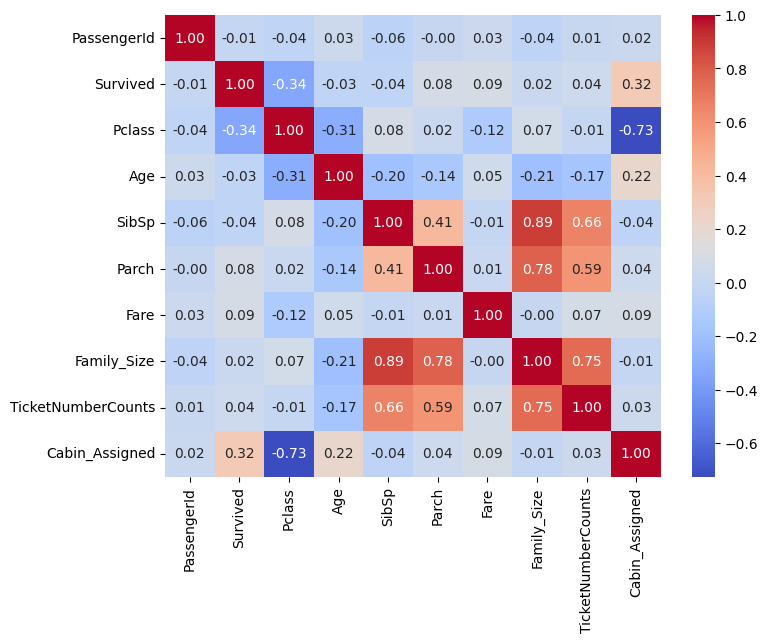

In [536]:
correlation_matrix = train.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [537]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)


In [538]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [539]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [540]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
   # ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
     ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'TicketNumberCounts'])
    ],
    remainder='drop',
    n_jobs=-1)

In [541]:
rfc = RandomForestClassifier()

In [542]:
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [543]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [544]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [545]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [546]:
dtc = DecisionTreeClassifier()

In [547]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [548]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [549]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)


ValueError: A given column is not a column of the dataframe

In [550]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [551]:
knn = KNeighborsClassifier()


In [552]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}

In [553]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [554]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)


ValueError: A given column is not a column of the dataframe

In [555]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [556]:
svc = SVC(probability=True)


In [557]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}


In [558]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [559]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [560]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [561]:
lr = LogisticRegression()


In [562]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

In [563]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [564]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)


ValueError: A given column is not a column of the dataframe

In [565]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [566]:
gnb = GaussianNB()
param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001],
}

In [567]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [568]:
pipefinalgnb= make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)


ValueError: A given column is not a column of the dataframe

In [ ]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

In [569]:
xg = XGBClassifier()


In [570]:
param_grid = {
     'booster': ['gbtree', 'gblinear','dart'],
}

In [571]:
CV_xg = GridSearchCV(estimator=xg, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [572]:
pipefinalxg= make_pipeline(col_trans, CV_xg)
pipefinalxg.fit(X_train, y_train)


ValueError: A given column is not a column of the dataframe

In [573]:
print(CV_xg.best_params_)
print(CV_xg.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [574]:
abc = AdaBoostClassifier()

In [575]:
dtc_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,min_samples_leaf=4, min_samples_split=10)  
svc_2 = SVC(probability=True, C=10, kernel='rbf') 
lr_2 = LogisticRegression(C=0.1) 
lr_3 = LogisticRegression(C=0.2) 
lr_4 = LogisticRegression(C=0.05) 

In [576]:
param_grid = {
    'estimator': [dtc_2, svc_2, lr_2], 
    'n_estimators':  [5, 10, 25, 50, 100],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [(0.97 + x / 100) for x in range(1, 7)]  
}

In [577]:
CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [578]:
pipefinalabc= make_pipeline(col_trans, CV_abc)
pipefinalabc.fit(X_train, y_train)


ValueError: A given column is not a column of the dataframe

In [579]:
print(CV_abc.best_params_)
print(CV_abc.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [580]:
etc = ExtraTreesClassifier()

In [581]:
param_grid = {
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300],
}

In [582]:
CV_etc = GridSearchCV(estimator=etc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [583]:
pipefinaletc= make_pipeline(col_trans, CV_etc)
pipefinaletc.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [584]:
print(CV_etc.best_params_)
print(CV_etc.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [585]:
GBC = GradientBoostingClassifier()


In [586]:
param_grid = {
              'n_estimators' : [300, 400, 500],
              'learning_rate': [ 0.1, 0.3, 0.6, 1.0],
              'max_depth': [8, 10, 12],
              'min_samples_leaf': [50, 100, 120, 150],
              'max_features': [0.1, 0.3, 0.5] 
              }

In [587]:
CV_gbc = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [588]:
pipefinalgbc= make_pipeline(col_trans, CV_gbc)
pipefinalgbc.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [589]:
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [590]:
vc1 = VotingClassifier([('gbc', CV_gbc.best_estimator_),
                        ('etc', CV_etc.best_estimator_),
                          ('nb', CV_gnb.best_estimator_)
                         ], voting='hard', weights=[1,2,3] )

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [591]:
vc2 = VotingClassifier([('abc', CV_abc.best_estimator_),
                        ('etc', CV_etc.best_estimator_),
                          ('nb', CV_gnb.best_estimator_)
                         ], voting='hard', weights=[1,2,3] )

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [592]:
pipefinalcv1 = make_pipeline(col_trans, vc1)

NameError: name 'vc1' is not defined

In [593]:
pipefinalcv2 = make_pipeline(col_trans, vc2)


NameError: name 'vc2' is not defined

In [594]:
pipefinalcv1.fit(X_train, y_train)


NameError: name 'pipefinalcv1' is not defined

In [595]:
pipefinalcv2.fit(X_train, y_train)


NameError: name 'pipefinalcv2' is not defined

In [596]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)
Y_pred7 = pipefinalxg.predict(X_test)
Y_pred8 = pipefinalabc.predict(X_test)
Y_pred9 = pipefinaletc.predict(X_test)
Y_pred10 = pipefinalgbc.predict(X_test)
Y_pred11 = pipefinalcv1.predict(X_test)
Y_pred12 = pipefinalcv2.predict(X_test)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'